<a href="https://colab.research.google.com/github/saifghostrider454/Second_Project/blob/master/Hotel_EDA_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

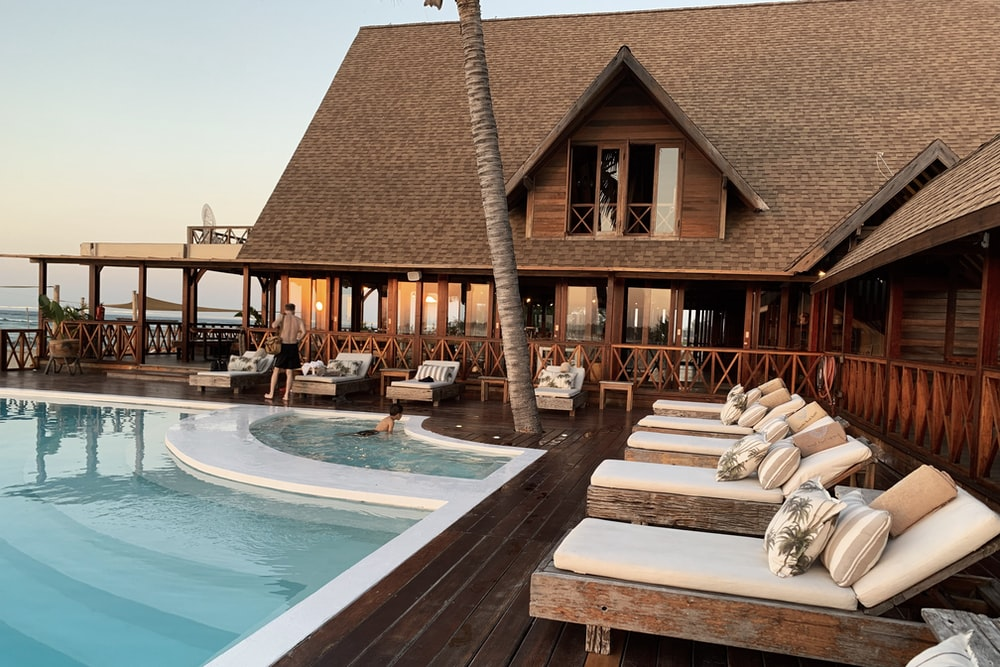

# **Project Name**    -



##### **Project Type**    - HOTEL BOOKING ANALYSIS (EDA)
##### **Contribution**    - Individual
##### **Name**            - Md Saif Ansari

# **Project Summary -**

The hospitality industry is competitive, and businesses need to keep up with the latest hospitality trends to avoid being left behind. However, the needs and priorities of customers have also changed due to COVID. Keeping pace with the industry is a great way to ensure your business delivers the kind of customer experience people want and expect. This includes everything from marketing efforts and hospitality processes to embracing the latest technology and responding to global events. And one of the best ways to do so is by analyzing the real-time hotel booking data set to gain insights about the change in customer booking trends and based on those businesses can come up with the best strategies to deliver the best customer experience..

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

We start with data cleaning, like removing duplicate values, identifying null values, and then imputing them or removing them as per requirement, and removing trivial data if found. We will also do quality assurance to convert our raw data into appropriate formats. We do all this cleaning so that any insignificant data does not produce any irrelevant result leading to wrong analysis. Our second step is going to be exploratory data analysis – summary statistics, finding outliers, correlations between variables, transforming our data analysis into data visualizations which will help us to summarize the data so we can easily spot trends, patterns, and relationships in the data set, etc. Lastly, we will create our model to predict the busiest time for the booking, the customer groups generating more revenue and factors leading to cancellations.

Our agenda is to determine the busiest time for the bookings in both the hotels, find the customer type leading to more revenue generation and the booking cancellation reasons. This helps in determining the factors which can be emphasized by the hotels to provide the best customer experience. We need to find the dependency of variables on each other and variables affecting our problem statements, in the data set. Once we have determined the variables, we can apply any algorithm like a decision tree to predict the busiest time or customer type by training our model with the current data. Additionally, we will also try to find out the revenue generation of each hotel and the factors which drive it.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



The data set which we have chosen to do analysis contains hotel demand data of two hotels in Portugal: Resort Hotel of Algarve and City Hotel of Lisbon. This data set has 31 variables describing 40,060 observations of Resort hotel and 79,330 observations of City Hotel.

Following are the problem statements that we are going to answer with our analysis:

- In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is not dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels, nprimary goal in order to increase their efficiency in generating revenue, and for us to offer through business advice to address this problem.
- To visualize which year, which month and among weekday / weekend nights have the maximum booking , to understand what is the best time to generate revenue flow in the business.
- To understand which type of customer, for e.g., new customers or existing customers, customers belonging to certain age groups or customers having family, etc., add more revenue to the business.
- To understand what are the factors leading to cancellations of booking affecting the revenue generation of the hotels.

#### **Define Your Business Objective?**

The project aims to gain interesting insight into customers’ behavior when booking a hotel. The demand for different segment of customer may differ and forecasting become harder as it may requires different model for different segment.These insights can guide hotels to adjust their customer strategies and make preparation for unknown.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


hotel=pd.read_csv('/content/drive/MyDrive/datasharing/Hotel Bookings.csv')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
pd.concat([hotel.head(), hotel.tail()])

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          1   
119385                            0                          0   
119386                            0                          2   
119387                            0                          

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows=hotel.shape[0]
columns=hotel.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

The no of rows is 119390 and no of columns is 32


### Dataset Information

In [ ]:
# Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
hotel.duplicated().sum()

31994

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

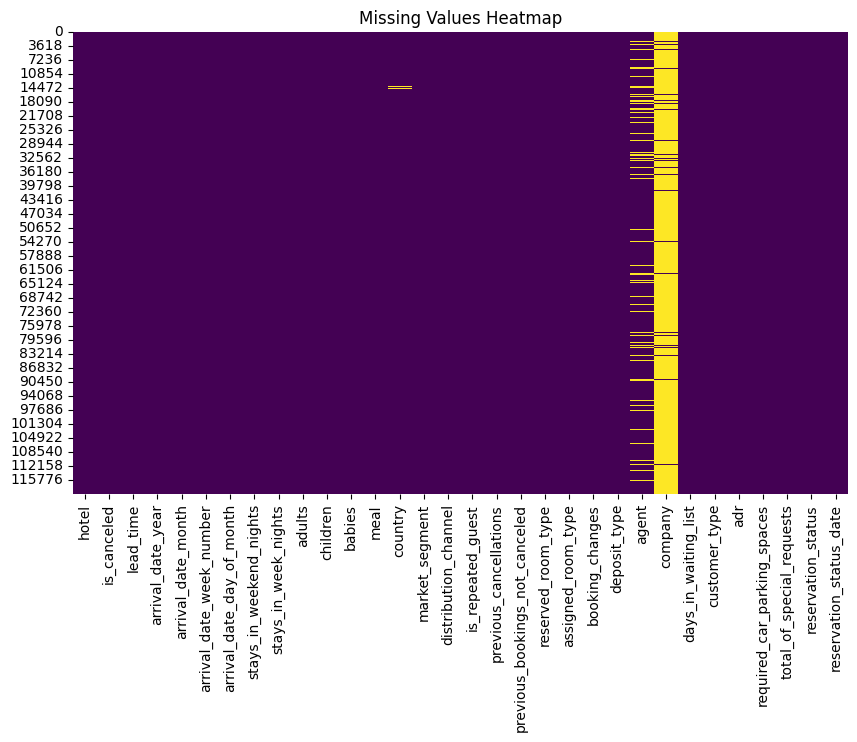

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(hotel.isna(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

We can see that there are total four columns with missing/null values : company, agent, country, children.

1. In children column, I will replace null values with 0 assuming that customer did not have any children.
2. Column country has null values. I will reolace null values in this column with 'Others' assuming customer's country was not mentioned while booking.
3. In company and agent column it might be a case when customers did not book hotel through them so these columns might have null values in it. As these 2 columns have numeric data in it, I will replace them with 0.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
hotel.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

### Variables Description

**Hotel :** (Resort Hotel or City Hotel)

**is_canceled**: Value indicating if the booking was canceled (1) or not (0)

**lead_time :** * Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

**arrival_date_year :** Year of arrival date

**arrival_date_month :** Month of arrival date

**arrival_date_week_number :** Week number of year for arrival date

**arrival_date_day_of_month :** Day of arrival date

**stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights :** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults :** Number of adults

**children :** Number of children

**babies :** Number of babies

**meal :** Type of meal booked. Categories are presented in standard hospitality meal packages

**country :** Country of origin.` market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest :** Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type :** Code for the type of room assigned to the booking.

**booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type :** Indication on if the customer made a deposit to guarantee the booking.

**agent :** ID of the travel agency that made the booking

**company :** ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type :** Type of booking, assuming one of four categories

**adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces :** Number of car parking spaces required by the customer

**total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status :** Reservation last status, assuming one of three categories

**Canceled –** booking was canceled by the customer
**Check-Out –** customer has checked in but already departed
**No-Show –** customer did not check-in and did inform the hotel of the reason why
**reservation_status_date -** Date at which the last status was set

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({col:hotel[col].unique() for col in hotel})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
hotel1 = hotel.copy()

In [ ]:
hotel1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# replacing null values in children column with 0 assuming that family had 0 children
# replacing null values in company and agent columns with 0 assuming those rooms were booked without company/agent

hotel1['children' ].fillna(0, inplace = True)
hotel1['company' ].fillna(0, inplace = True)
hotel1['agent' ].fillna(0, inplace = True)

# replacing null values in country column as 'Others'

hotel1['country'].fillna('Others', inplace = True)

In [ ]:
# checking for null values after replacing them
hotel1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# dropping the 'company' column as it contains a lot of null values in coparison to other columns
hotel1.drop(['company'], axis =1 , inplace = True)        # dropping the values vertically at axis 1 (columns)

In [ ]:
# dropping rows where no adults , children and babies are available because no bookings were made that day

no_guest=hotel1[hotel1['adults']+hotel1['babies']+hotel1['children']==0]
hotel1.drop(no_guest.index, inplace=True)

In [ ]:
# adding some new columns to make our data analysis ready
hotel1['total_people'] = hotel1['adults'] + hotel1['babies'] + hotel1['children']       # creating total people column by adding all the people in that booking

hotel1['total_stay'] = hotel1['stays_in_weekend_nights'] + hotel1['stays_in_week_nights']    # creating a column to check total stay by prople in that booking

In [ ]:
hotel1['reservation_status_date'] = pd.to_datetime(hotel1['reservation_status_date'])

In [ ]:
# having a final look to check if our dataset is ready to analyse
pd.concat([hotel1.head(), hotel1.tail()])


hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  agent  days_in_waiting_list  \
0                          0       2  ...    0.0                     0   
1                          0       2  ...    0.0                     0   
2                          1       1  ...    0.0                     0   
3                          1       1  ...  304.0                     0   
4                          2       2  ...  240.0                     0   
119385                     5       2  ...  394.0                     0   
119386                     5       3  ...    9.0                     0   
119387                     5       2  ...    9.0                     0   
119388                     5       2  ...   89.0                     0   
119389                     7       2  ...    9.0                     0   

       customer_type     adr required_car_parking_spaces  \
0          Transient    0.00                           0   
1          Transient    0.00                           0   
2          Transient   75.00                           0   
3          Transient   75.00                           0   
4          Transient   98.00                           0   
119385     Transient   96.14                           0   
119386     Transient  225.43                           0   
119387     Transient  157.71                           0   
119388     Transient  104.40                           0   
119389     Transient  151.20                           0   

       total_of_special_requests  reservation_status  reservation_status_date  \
0                              0           Check-Out               2015-07-01   
1                              0           Check-Out               2015-07-01   
2                              0           Check-Out               2015-07-02   
3                              0           Check-Out               2015-07-02   
4                              1           Check-Out               2015-07-03   
119385                    

In [ ]:
# checking the final shape of the dataset
print(f' final shape of the dataset is {hotel1.shape}')

 final shape of the dataset is (119210, 33)


In [ ]:
# checking the unique values which is to be analysed
pd.Series({col:hotel1[col].unique() for col in hotel1})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]
children                                                 [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                             [0, 1, 2,

We can see that we have dealt with all the null values and added some new columns and now our dataset is ready to analysed.

### What all manipulations have you done and insights you found?

Created a copy of the dataset before doing any manipulation then filled missing values with 0 in children , company and agent columns as those columns had numerical values and in column country filled missing values with 'others'.
after dealing with missing values I dropped the country column as this had 96% missing values and was of no  use in our analysis.
In next step I created 2 new columns named 'total_people' and 'total_stay' for further analysis. In total people column I added all the babies, children and adults. similarly in second new column I added weekend stay and week stay column.

After doing all the manipulation I checked new manipulated dataset to check if this is ready to be analyzed.

After **manipulating** the dataset these were the **insights I found**:

**1.** There are 2 types of hotel which guests could book so I
   can find which type of hotel was booked most.

**2.** There are different types of guests and they come from
    different countries.

**3.** Guests can choose different foods from the menu.

**4.** Guests can book hotel directly or through different
    channels that are available.

**5.** Guests can cancel their booking and there are
    repeated guests also.

**6.** Guests can choose rooms of their liking while booking.

**7.** There is column available in the dataset named 'adr' which
   could be used to analyze hotel's performance on the basis
   of revenue.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

***Which type of hotel is most preffered by the guests?***

In [ ]:
hotel_name = hotel1['hotel'].unique()

# Checking the number of unique booking in each hotel type
unique_booking = hotel1.hotel.value_counts().sort_values(ascending=True)

# Creating a donut chart using plotly.express
fig1 = px.pie(names = hotel_name, values = unique_booking, hole = 0.4, color = hotel_name,
              color_discrete_map={
                  'Resort Hotel': 'teal' , 'City Hotel' : 'nude'})

# Giving it a title and updating the text info
fig1.update_traces(textinfo = 'percent + value')
fig1.update_layout(title_text = 'Hotel Booking Percentage', title_x = 0.5)

# Setting the legend at center
fig1.update_layout(legend=dict(
    orientation = 'h',
    yanchor = 'bottom',
    xanchor = 'center',
    x = 0.5
))
fig1.update_layout(width=520, height=400)

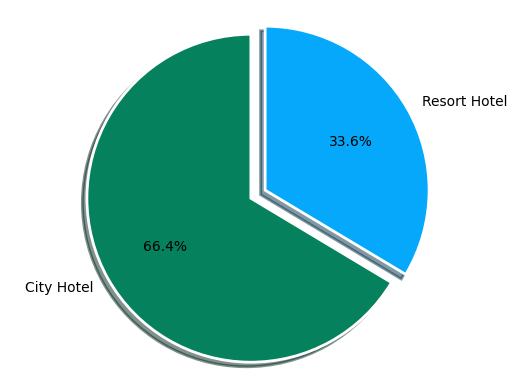

In [ ]:
hotel_counts = hotel1['hotel'].value_counts()

plt.pie(hotel_counts, explode = [0, 0.1], labels = hotel_counts.index,
        autopct = '%1.1f%%',shadow = True,
        startangle = 90,
        wedgeprops = {"edgecolor":"white",
                    'linewidth': 2,
                    'antialiased': True},
        colors=['#05815E', '#05A8FA'])

# Equal aspect ratio ensures
# that pie is drawn as a circle.
plt.axis('equal')

plt.show()
print()
fig1.show(renderer='colab')

##### 1. Why did you pick the specific chart?

I used Pie chart here because it is used to show the proportions of categorical data, with the size of each piece representing the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

I found out that guests prefer Resort Hotel most over City Hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is useful for the stakeholder to check which hotel is performing best and they can invest more capitals in that.
There is no such negative growth but stakeholders can focus more on City Hotel to get more booking and icrease the overall revenue.

#### Chart - 2

***What is perecentage of hotel booking cancellation?***

In [ ]:
canceled = hotel1['is_canceled'].unique()

# Checking the number of unique booking in each hotel type
unique_booking = hotel1.is_canceled.value_counts().sort_values(ascending=True)

# Creating a donut chart using plotly.express
fig2 = px.pie(names = hotel_name, values = unique_booking, hole = 0.4, color = hotel_name,
              color_discrete_map={
                  'Not Cancelled': 'teal' , 'Cancelled' : 'nude'})

# Giving it a title and updating the text info
fig2.update_traces(textinfo = 'percent + value')
fig2.update_layout(title_text = 'Hotel Booking Cancelation Percentage', title_x = 0.5)

# Setting the legend at center
fig2.update_layout(legend=dict(
    orientation = 'h',
    yanchor = 'bottom',
    xanchor = 'center',
    x = 0.5
))
fig2.update_layout(width=540, height=400)

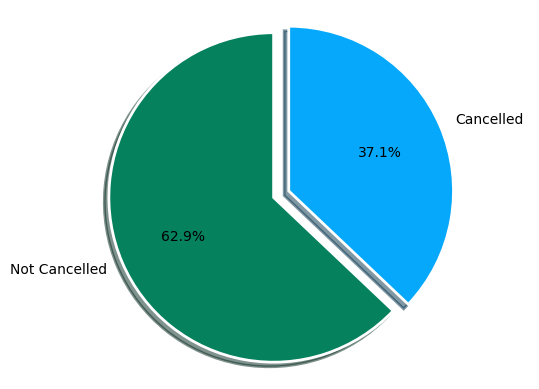

In [ ]:
# Chart - 2 visualization code
is_canceled = hotel1.is_canceled.value_counts()

plt.pie(is_canceled, explode = [0, 0.1], labels = ['Not Cancelled', 'Cancelled'],
        autopct = '%1.1f%%',shadow = True,
        startangle = 90,
        wedgeprops = {"edgecolor":"white",
                    'linewidth': 2,
                    'antialiased': True},
        colors=['#05815E', '#05A8FA'])

# Equal aspect ratio ensures
# that pie is drawn as a circle.
plt.axis('equal')

plt.show()
print()
fig2.show(renderer='colab')

##### 1. Why did you pick the specific chart?

I had to show a part-to-a-whole relationship and percentage of both the values and here pie chart was a good option to show segmented values.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that around 62.90% bookins are not canceled by guests but around 37.10% bookings are canceled by guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help stakeholders in comparing the cancellation and non cancellation of bookings. With the help of this insight stakeholders can offer rescheduling the bookings instead of cancellation and set a flexible cancellation policy to reduce booking cancellation.

#### Chart - 3

***Which type of meal is most preffered by guests?***

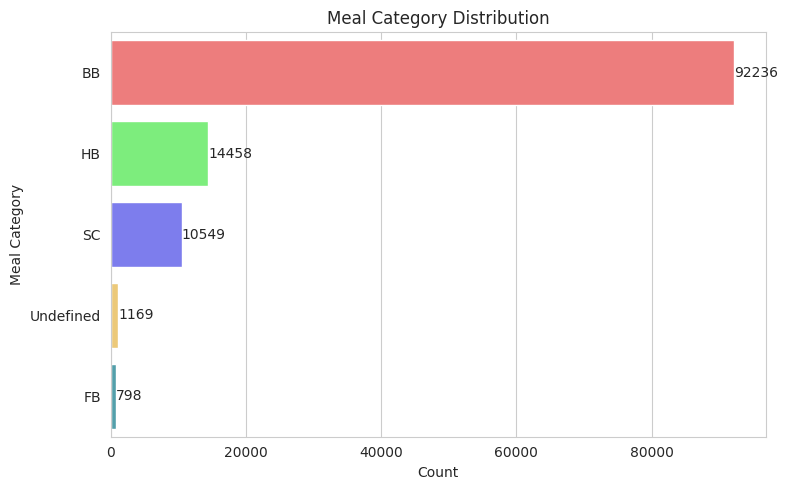

In [ ]:
# Chart - 3 visualization code

meal_Df = hotel1['meal'].value_counts().reset_index().rename(columns={'index': 'Meal', 'meal': 'Count'})

custom_palette = ['#FF6B6B', '#6BFF6B', '#6B6BFF', '#FFD166', '#45AAB8']


plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")


ax = sns.barplot(x='Count', y='Meal', data=meal_Df, palette=custom_palette)


plt.title('Meal Category Distribution')
plt.xlabel('Count')
plt.ylabel('Meal Category')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.tight_layout()
plt.show()

**Meal type variable description:**

**BB** - (Bed and Breakfast)

**HB**- (Half Board)

**FB**- (Full Board)

**SC**- (Self Catering)

##### 1. Why did you pick the specific chart?

There were 4 values to compare and Bar graphs are used to compare things between different groups that is why I used this chart.

##### 2. What is/are the insight(s) found from the chart?

After visualizing the above chart we can see that BB - (Bed and Breakfast) is the most preffered meal type by guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the gained insight above now stakeholders know that  **BB(Bed and Breakfast)** is most preferred meal type so they can arrange raw material for this meal in advance and deliver the meal without any delay.

#### Chart - 4

**Which year has the most bookings ?**

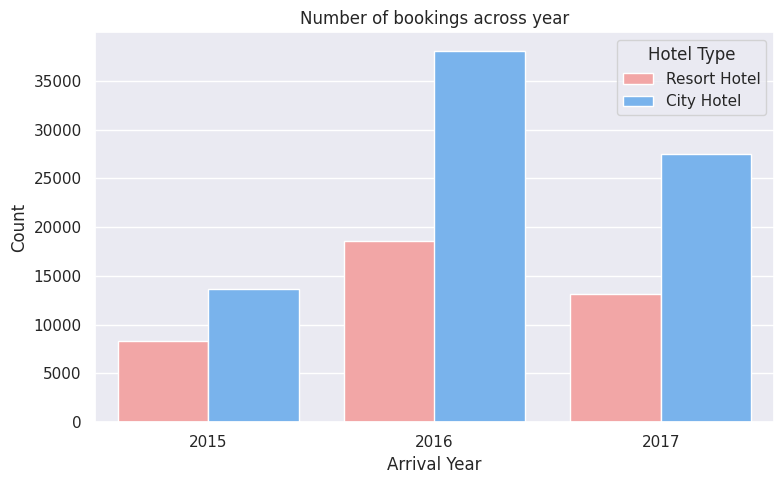

In [ ]:
# Chart - 4 visualization code
custom_palette = ["#ff9999", "#66b3ff"]

sns.set(style="darkgrid")

plt.figure(figsize=(8, 5))

ax = sns.countplot(x=hotel1['arrival_date_year'], hue=hotel1['hotel'], palette=custom_palette)

plt.title('Number of bookings across year')
plt.xlabel('Arrival Year')
plt.ylabel('Count')

plt.legend(title='Hotel Type', loc='upper right')

legend = ax.get_legend()
legend.set_title('Hotel Type')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are used to compare things between different groups that is why I used this chart.

##### 2. What is/are the insight(s) found from the chart?

From above insight I found out that hotel was booked most times in year 2016.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above insight shows that number of booking was declined after year 2016.
Stakeholders can now what went wrong after 2016 and fix that problem to increase the umber of bookings. One way to do this is ask for feedbacks from guests and have a meeting with old employees who else were serving int the year 2016.

#### Chart - 5

**Which month has the most bookings in each hotel type?**

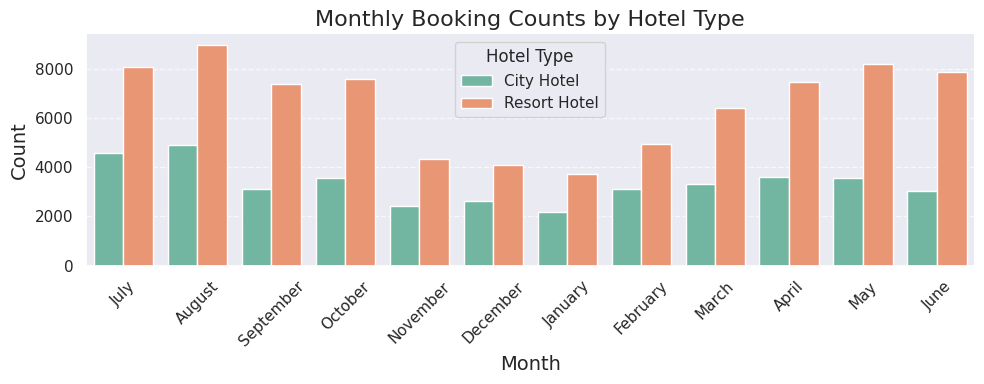

In [ ]:
# Chart - 5 visualization code
palette = sns.color_palette("Set2")

# Create a figure and axis objects
plt.figure(figsize=(10, 4))
ax = sns.countplot(x=hotel1['arrival_date_month'], hue=hotel1['hotel'], palette=palette)

# Customize the plot
ax.set_title('Monthly Booking Counts by Hotel Type', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Hotel Type', title_fontsize=12, labels=['City Hotel', 'Resort Hotel'])

# Add grid lines
sns.set(style="darkgrid")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I had to compare values across the months and for that bar chart was one of the best choice.

##### 2. What is/are the insight(s) found from the chart?

Above insight shows that August and July ware 2 most busy months in compare to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is negative insight but hotel can use this insight to arrange everything in advance and welcome their guest in the best way possible and hotel can also run some promotional offer in these 2 months to attract more guests.

#### Chart - 6

**From which country most guests come?**

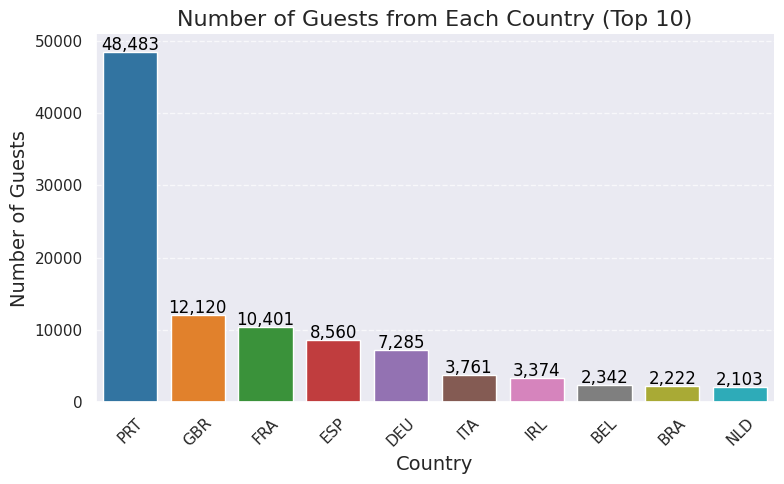

In [ ]:
# Chart - 6 visualization code
country10 = hotel1.country.value_counts().head(10).reset_index().rename(columns={'index': 'Country', 'country': 'Number of Guests'})
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Country', y='Number of Guests', data=country10, palette=palette)

ax.set_title('Number of Guests from Each Country (Top 10)', fontsize=16)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Number of Guests', fontsize=14)
ax.tick_params(axis='x', labelrotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

sns.set(style="whitegrid")
ax.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Here I comapred different values that's why I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I found out that most guests come from PRT(Portugal).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative insight.
After knowing that most of the guests come from Portugal Hotels can add more Portugal cousines in their menu to make guests order more food.

#### Chart - 7

**Which distribution channel is most used in booking?**

In [ ]:
# Data preparation (you can use your existing 'dist_df')
def bar():
  dist_df = hotel1['distribution_channel'].value_counts().reset_index()
  dist_df = dist_df.rename(columns={'index': 'Channel name', 'distribution_channel': 'channel count'})

  # Calculate percentages
  dist_df['percentage'] = round(dist_df['channel count'] * 100 / hotel1.shape[0], 1)

  # Sort the dataframe by channel count for better visualization
  dist_df = dist_df.sort_values(by='channel count', ascending=False)

  # Define a custom color palette
  colors = ['#FF6B6B', '#6BFF6B', '#6B6BFF', '#FFD166', '#45AAB8']

  # Create a figure and axis objects
  plt.figure(figsize=(7.5, 5))
  ax = sns.barplot(x='percentage', y='Channel name', data=dist_df, palette=colors)

  # Adding data labels to the bars
  for p in ax.patches:
      width = p.get_width()
      plt.text(5 + width, p.get_y() + p.get_height() / 2, f'{width}%', va='center', fontsize=12, fontweight='bold')

  # Customize labels and title
  plt.xlabel('Percentage', fontsize=14)
  plt.ylabel('Channel Name', fontsize=14)
  plt.title('Most Used Booking Distribution Channels by Guests', fontsize=16)

  # Show the plot
  plt.tight_layout()
  plt.show()

def pie():
  dist_df = hotel1['distribution_channel'].value_counts().reset_index()

# Renaming the columns to approproiate names
  dist_df = dist_df.rename(columns={'index':'Channel name', 'distribution_channel':'channel count'})

  # Creating a explode data
  my_explode = (0.05,0.05,0.05,0.05,0.05)

  #adding percentage columns to the distribution_channel_df
  dist_df['percentage']=round(dist_df['channel count']*100/hotel1.shape[0],1)

  # Deciding the figure size
  plt.figure(figsize=(8,5))

  # Plotting the chart values
  plt.pie(dist_df['channel count'], labels=None, explode = my_explode, startangle = 50)

  # Adding legends with percenatge using list comprehension
  labels = [f'{l}, {s}%' for l, s in zip(dist_df['Channel name'].value_counts().index.tolist(), dist_df['percentage'].values.tolist())]
  plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

  # Setting the chart title
  plt.title('Most Used Booking Distribution Channels by Guests' ,fontsize = 16)

  # Show the chart
  plt.axis('equal')
  plt.show()

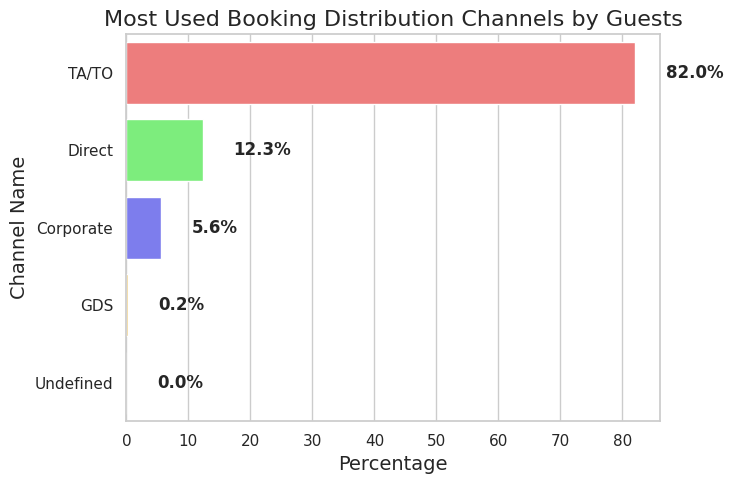

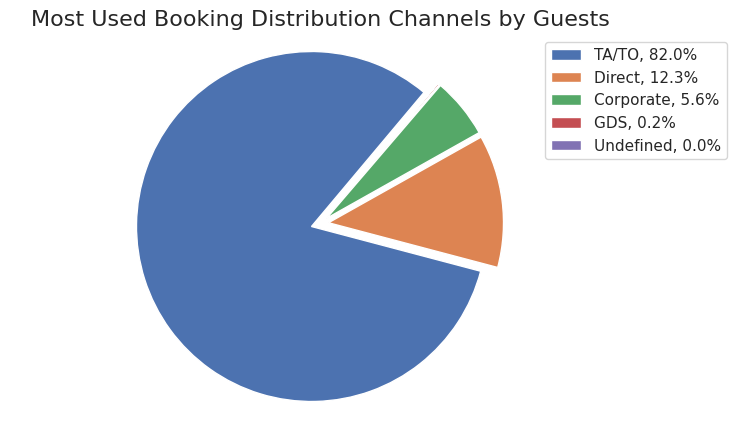

In [ ]:
# Chart - 7 visualization code
bar()
print()
pie()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

**Which room type is most preffered by guests?**

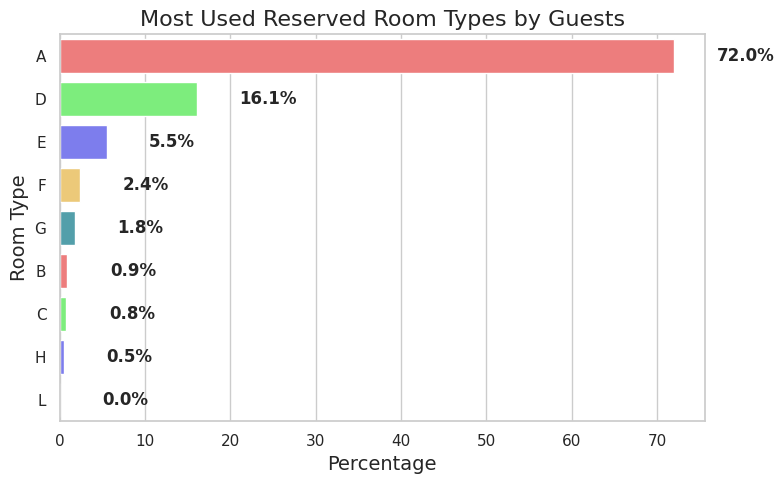

In [ ]:
# Chart - 8 visualization code

dist_df = hotel1['reserved_room_type'].value_counts().reset_index()
dist_df = dist_df.rename(columns={'index': 'Room Type', 'reserved_room_type': 'Count'})

dist_df['percentage'] = round(dist_df['Count'] * 100 / hotel1.shape[0], 1)

dist_df = dist_df.sort_values(by='Count', ascending=False)

colors = ['#FF6B6B', '#6BFF6B', '#6B6BFF', '#FFD166', '#45AAB8']

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='percentage', y='Room Type', data=dist_df, palette=colors)

for p in ax.patches:
    width = p.get_width()
    plt.text(5 + width, p.get_y() + p.get_height() / 2, f'{width}%', va='center', fontsize=12, fontweight='bold')

plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Room Type', fontsize=14)
plt.title('Most Used Reserved Room Types by Guests', fontsize=16)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data and also percentage.

##### 2. What is/are the insight(s) found from the chart?

By observing the above chart we can understand that the room type A most preffered (almost 55,000 or 72%) by the guests while booking the hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As it is clear that room type A is most used hotel should increase the number of A type room to maximize the revenue.

#### Chart - 9

***Which room type is most assigned?***

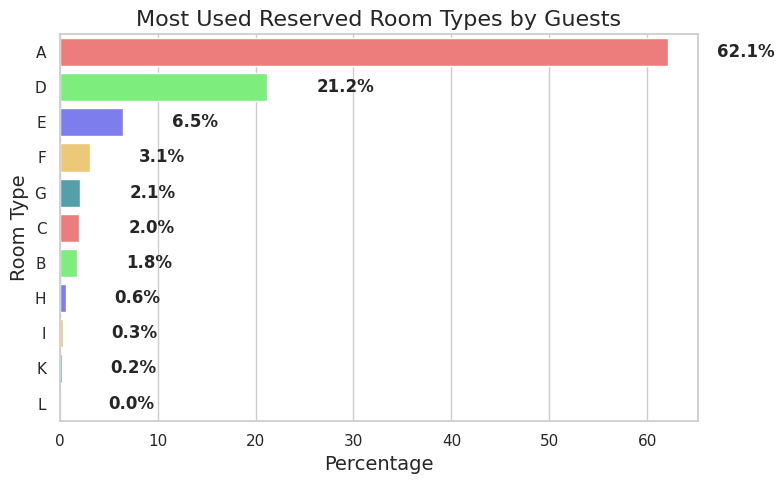

In [ ]:
# Chart - 9 visualization code

dist_df = hotel1['assigned_room_type'].value_counts().reset_index()
dist_df = dist_df.rename(columns={'index': 'Room Type', 'assigned_room_type': 'Count'})

dist_df['percentage'] = round(dist_df['Count'] * 100 / hotel1.shape[0], 1)

dist_df = dist_df.sort_values(by='Count', ascending=False)

colors = ['#FF6B6B', '#6BFF6B', '#6B6BFF', '#FFD166', '#45AAB8']

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='percentage', y='Room Type', data=dist_df, palette=colors)

for p in ax.patches:
    width = p.get_width()
    plt.text(5 + width, p.get_y() + p.get_height() / 2, f'{width}%', va='center', fontsize=12, fontweight='bold')

plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Room Type', fontsize=14)
plt.title('Most Used Reserved Room Types by Guests', fontsize=16)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clear that room type A is most assigned to guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the 8th chart we saw that around 55,000 (72.00%) guests preffered room type A but 45,000 (62.10%) people were assigned A type room. This could be a reason to cancel the bookings. Hotel could increase A type room to decrease cancellation.

#### Chart - 10

***Top 5 agents in terms of most bookings?***

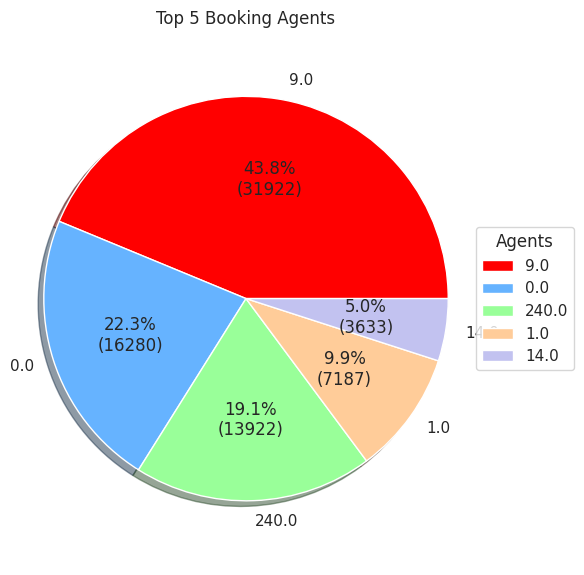

In [ ]:
# Chart - 10 visualization code
top_agents = hotel1.agent.value_counts().reset_index().rename(columns={'index': 'Agent', 'agent': 'Booking Count'}).head(5)
plt.figure(figsize=(6, 6))

# Define colors
colors = ['red', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create the pie plot
plt.pie(top_agents['Booking Count'], labels=top_agents['Agent'], autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(top_agents['Booking Count']) / 100), colors=colors, shadow=True)

# Add a title
plt.title('Top 5 Booking Agents')

# Add a legend inside the plot
plt.legend(title='Agents', labels=top_agents['Agent'], loc='center left', bbox_to_anchor=(1, 0.5))

# Ensure the pie plot is drawn as a circle
plt.axis('equal')

# Ensure labels fit within the figure
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole

##### 2. What is/are the insight(s) found from the chart?

We can see that agent number 9 has made the most number of bookings followed by agent number 240, 0, 14 and 7.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel can offer them bonus for their incredible work and to motivate them. This will help to increase the revenue.

#### Chart - 11

***What is the percentage of repeated guests?***

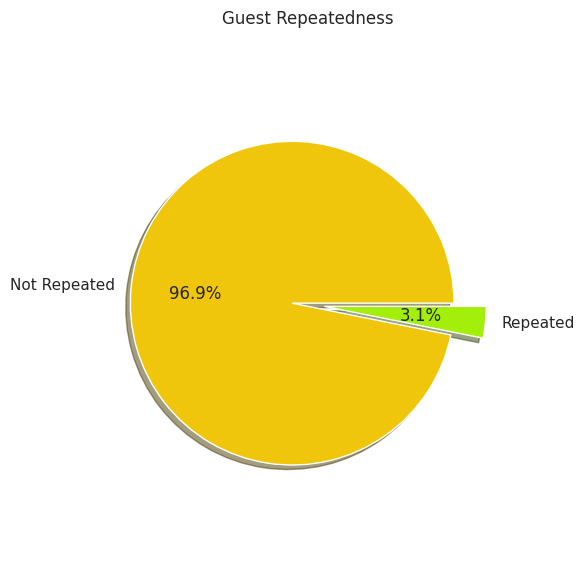

In [ ]:
# Chart - 11 visualization code

guest_counts  = hotel1.is_repeated_guest.value_counts().reset_index().rename(columns={'index': 'Is_Repeated_guest', 'is_repeated_guest': 'Number of Guests'})


# Set the figure size
plt.figure(figsize=(6, 6))

# Define colors
colors = ['#EFC60B', '#A3EF0B']

# Create the pie plot
plt.pie(guest_counts['Number of Guests'], labels=['Not Repeated', 'Repeated'], autopct='%1.1f%%', colors=colors, shadow=True, explode=[0, 0.2])

# Add a title
plt.title('Guest Repeatedness')

# Ensure the pie plot is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole

##### 2. What is/are the insight(s) found from the chart?

From the above insight we can see that 3.86% guests are repeated guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that number of repeated guests is very low and it shows negative growth of the hotel. Hotel can offer loyality discount to their guests to increase repeated guests.

#### Chart - 12

Country Wise Resorts and hotels Average Daily Rate

###### Function

In [ ]:
def country_year_wise_profit(country):
  country = country.upper()

  filtered = hotel1[hotel1['country'] == country][['hotel', 'arrival_date_year', 'adr']].groupby(['hotel', 'arrival_date_year'])['adr'].sum().reset_index()

  sns.relplot(kind='line', data=filtered, x='arrival_date_year', y='adr', hue='hotel', marker='D')

  plt.title('Year Wise Hotels Average Daily Rate')

  plt.show()

In [ ]:
hotel1.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Others', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA

##### visualize

`'PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Others', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD',
       'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA', 'TMP',
       'GLP', 'KEN', 'LIE', 'GNB', 'MNE', 'UMI', 'MYT', 'FRO', 'MMR',
       'PAN', 'BFA', 'LBY', 'MLI', 'NAM', 'BOL', 'PRY', 'BRB', 'ABW',
       'AIA', 'SLV', 'DMA', 'PYF', 'GUY', 'LCA', 'ATA', 'GTM', 'ASM',
       'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO'`

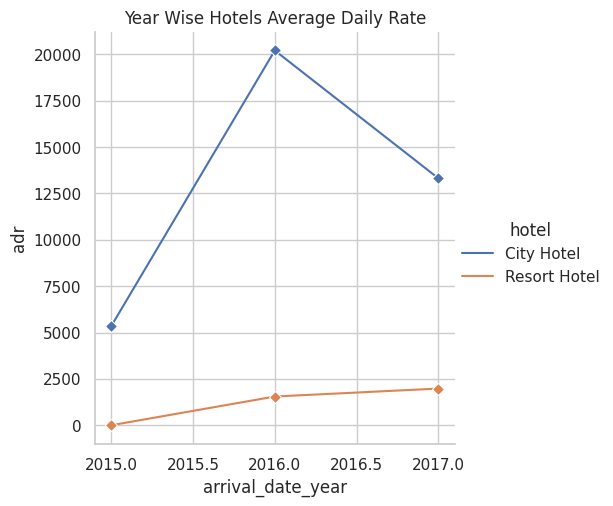

In [ ]:
# Chart - 12 visualization code
country_year_wise_profit('AGO')

##### 1. Why did you pick the specific chart?

Because in line chart we can compare Time Series Data like year wise rate

##### 2. What is/are the insight(s) found from the chart?

In This Chart we can see that most of the country's hotels Average Daily Rate has been increased specially City Hotels

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

***Which Market Segment has the most booking?***

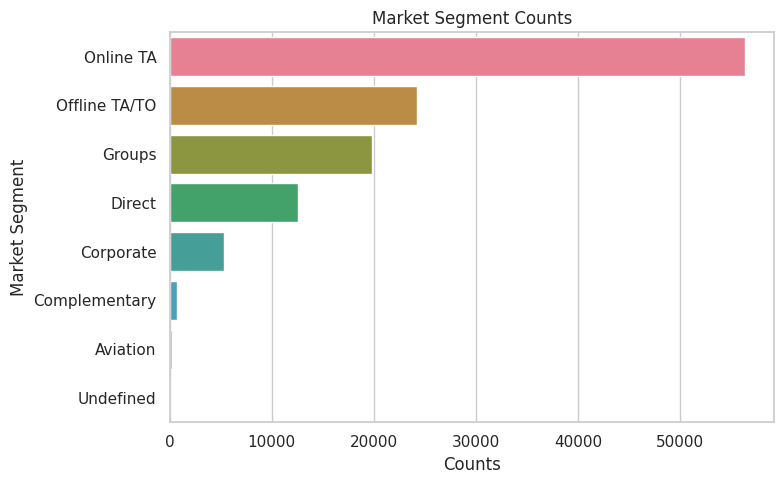

In [ ]:
# Chart - 13 visualization code
data = hotel1.market_segment.value_counts().reset_index().rename(columns={'index': 'Market Segment', 'market_segment': 'Counts'})
plt.figure(figsize=(8, 5))

# Use a custom color palette from Seaborn
colors = sns.color_palette('husl', len(data))

# Create the bar plot
sns.barplot(x='Counts', y='Market Segment', data=data, palette=colors)

# Add a title
plt.title('Market Segment Counts')

# Customize the labels
plt.xlabel('Counts')
plt.ylabel('Market Segment')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

##### 2. What is/are the insight(s) found from the chart?

Above insight shows that Online TA (Travel Agent) has the most bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative growth.
Hotel should come up with some great idea to increase sahre among other market segments to increase the revenue.

#### Chart - 14 - Correlation Heatmap

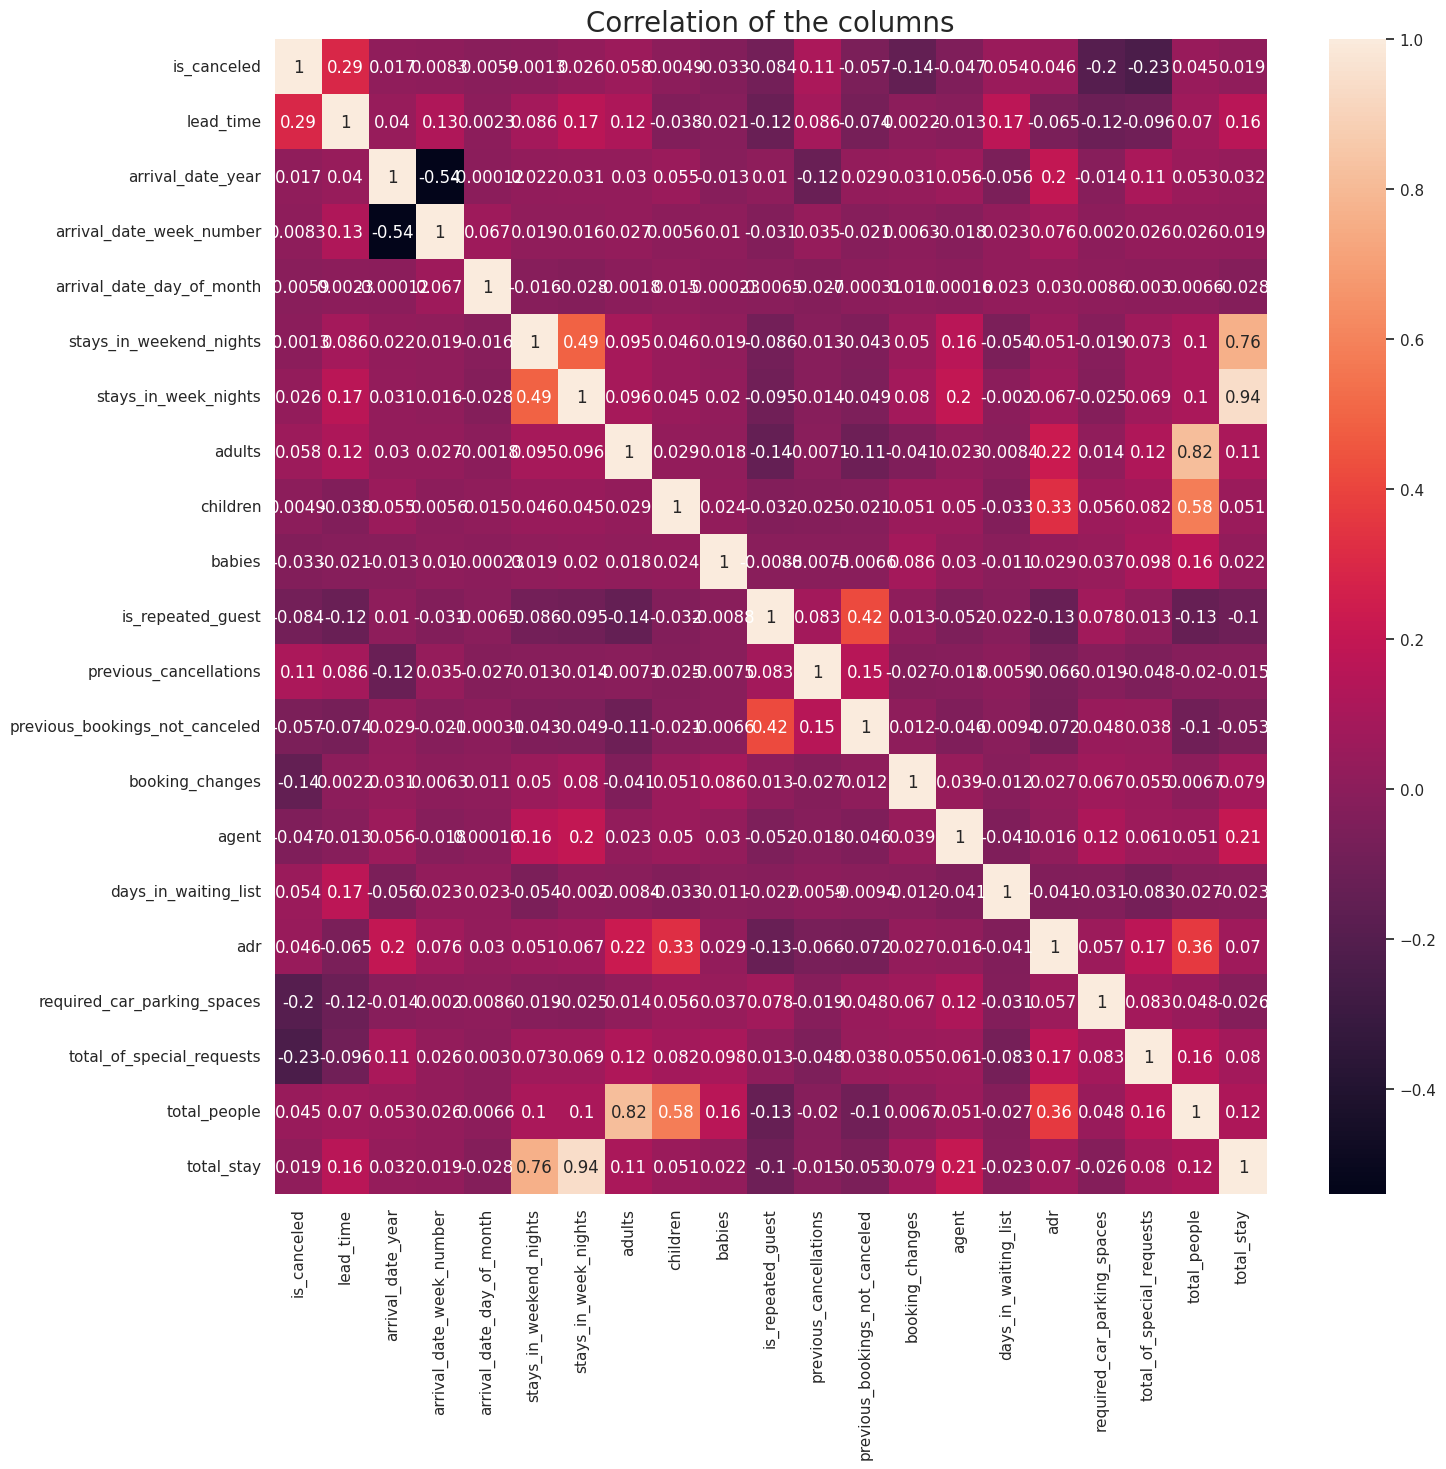

In [ ]:
# Correlation Heatmap visualization code

# Setting the chart size
plt.figure(figsize=(16,15))

# Creating heatmap to see correlation of each columns
sns.heatmap(hotel1.corr(numeric_only=True),annot=True)          # Setting the numeric only colun to True to avoid warning

# Setting the title
plt.title('Correlation of the columns', fontsize=20)

# Show heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.


##### 2. What is/are the insight(s) found from the chart?


1) lead_time and total_stay is positively corelated. that means if customers stay more then the lead time increases.

2)adults,childrens and babies are corelated to each other. That means more the people more will be adr.

3) is_repeated guest and previous bookings not canceled has strong corelation. That means repeated guests don't cancel their bookings.**

#### Chart - 15 - Pair Plot

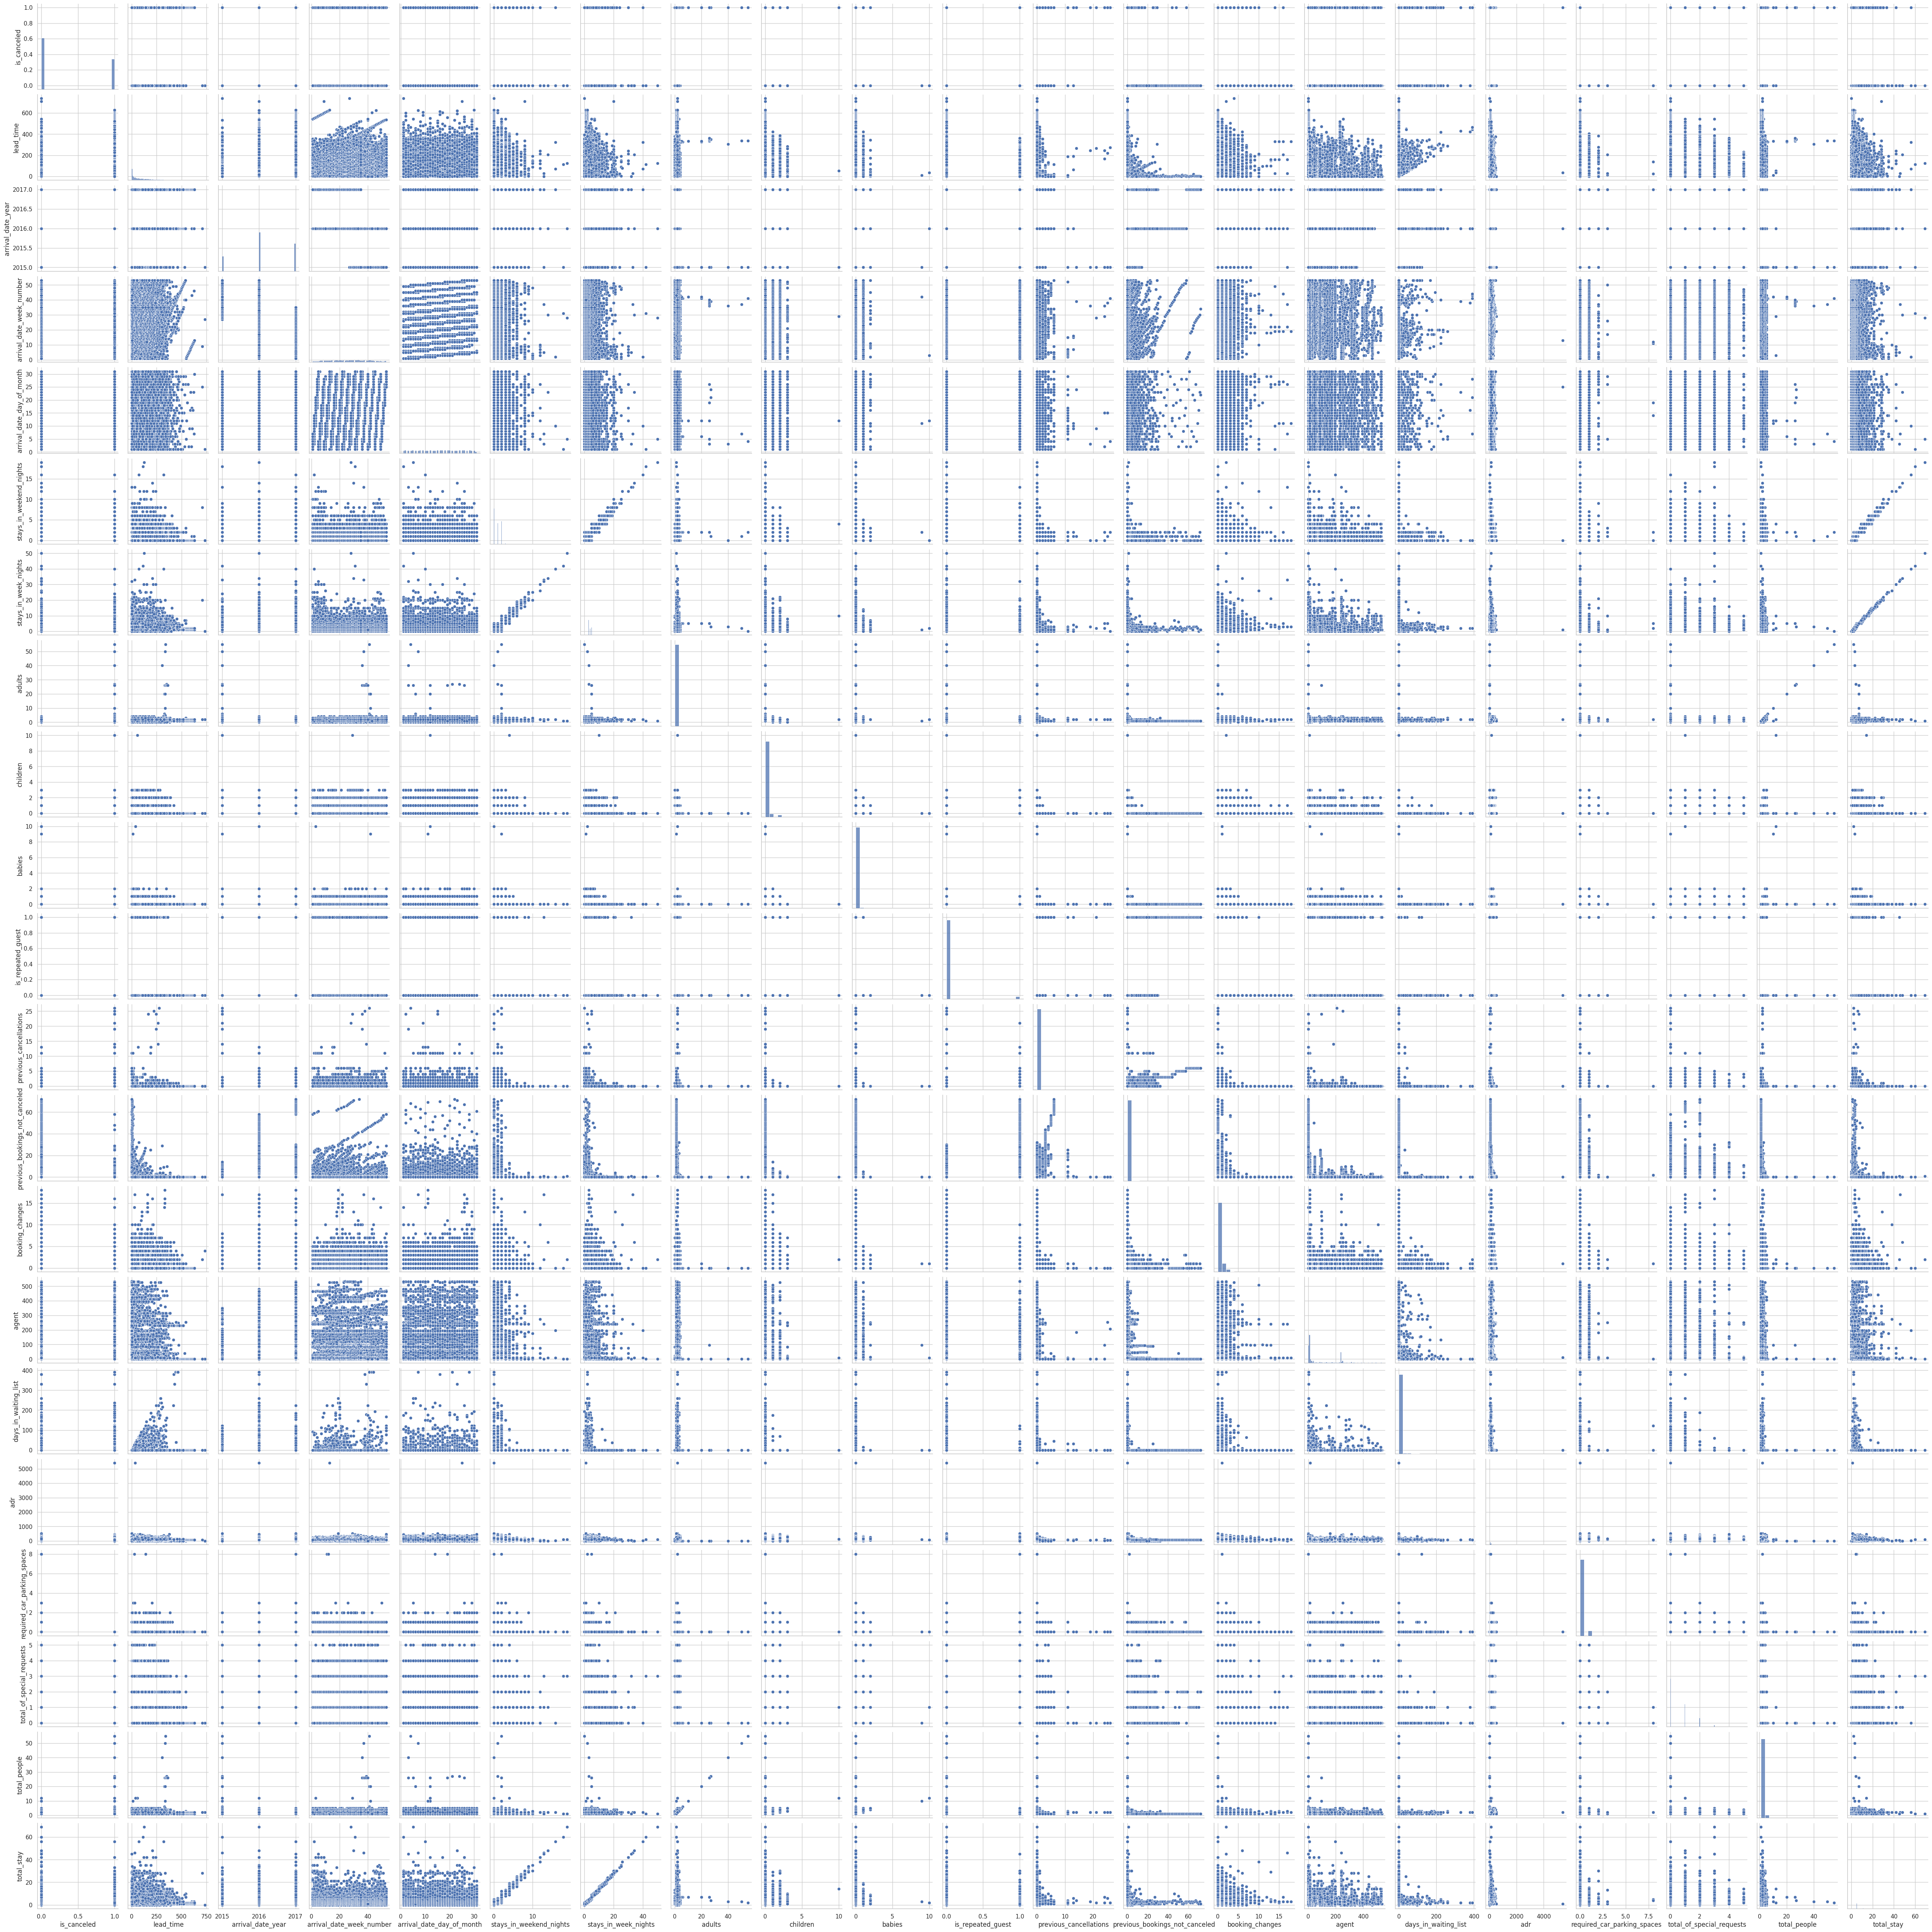

In [ ]:
# Pair Plot visualization code

sns.pairplot(hotel1)
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables .

We can see the realtionship between all the columns with each other in above chart.

1. From the above pair plot we can see that if cancellation increases then total stay also decreases.
2. As the total number of people increases adr also increases.
Thus adr and total people are directly proportional to each other.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Resort Hotel is most preffered so Stakeholders can offer discounts on City Hotel to increase bookings.
2. Around 27.52% of bookings are cancelled so Hotel can offer layality discount if guests don't cnacel their booking.
3.Hotel can maintain raw materials for BB type meal in advance to avoid delay as BB(Bead and Breakfast) is the most preffered meal.
4. Hotel should increase number of rooms in City Hotels to decrease the waiting time.
5. TA has the most number of bookings over other MArket segments so Hotel could run some offer to get more bookings from otehr segment.
6. Room type A is most preffered by guests so Hotel should increase the number of A type room.
7. Number of repeated guests is low that indicates that there is something they don't like about Hotel and that needs to be fixed to increase number of repeated guests.
8.Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
9. Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week so Hotel need to take some actions to improve their performance.
10. Maximum number of guests were from Portugal.

# **Conclusion**

Inorder to achieve the business objective, i would suggest the client to make the price dynamic, introduce offers and packages to attract new customers. To retain the existing customers and ensure their repetition the client must introduce loyalty points program which can be redeemed by the customers in their next bookings. Amenities such as parking spaces, kids corner, free internet connection can be provided to increase the number of bookings.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***